In [1]:
import pandas as pd

df = pd.read_csv('output.csv')
df.drop(columns=["seed", "total_time"], inplace=True)

print(df.head())

  type  pk_amount  main_task_time  additional_task_time  mean_access_time  \
0   LC          5               0                     0          0.105327   
1   LC          5               0                     0          0.111975   
2   LC          5               0                     0          0.112011   
3   LC          5               0                  3000          0.111527   
4   LC          5               0                  3000          0.110724   

   accesses_amount  
0         143325.6  
1         135221.9  
2         134602.8  
3         134288.3  
4         135292.0  


In [2]:
df = df.groupby(["type", "pk_amount", "main_task_time", "additional_task_time"]).agg(["mean", "std"])
df

mean_access_time            \
                                                               mean       std   
type pk_amount main_task_time additional_task_time                              
AO   5         0              0                            0.056390  0.002335   
                              3000                         0.076444  0.001069   
                              6000                         0.101629  0.000155   
                              9000                         0.146416  0.000339   
                              12000                        0.187064  0.000537   
...                                                             ...       ...   
LC   5         21000          9000                         3.882175  0.109142   
                              12000                        3.802012  0.275872   
                              15000                        3.689835  0.180745   
                              18000                        3.851957  0.064452   
                              21000                        3.828226  0.139273   

                                                   accesses_amount  \
                                                              mean   
type pk_amount main_task_time additional_task_time                   
AO   5         0              0                      265567.900000   
                              3000                   195837.766667   
                              6000                   147406.900000   
                              9000                   102361.066667   
                              12000                   80148.033333   
...                                                            ...   
LC   5         21000          9000                     3864.933333   
                              12000                    3959.166667   
                              15000                    4071.366667   
                              18000                    3893.966667   
                              21000                    3921.200000   

                                                                  
                                                             std  
type pk_amount main_task_time additional_task_time                
AO   5         0              0                     11052.259022  
                              3000                   2708.746918  
                              6000                    226.701985  
                              9000                    238.736703  
                              12000                   233.081624  
...                                                          ...  
LC   5         21000          9000                    108.023624  
                              12000                   299.864342  
                              15000                   203.517501  
                              18000                    64.620224  
                              21000                   145.771019  

[128 rows x 4 columns]

In [3]:
df_lc = df.loc['LC'].reset_index()
df_ao = df.loc['AO'].reset_index()
df_lc

pk_amount main_task_time additional_task_time mean_access_time            \
                                                             mean       std   
0          5              0                    0         0.109771  0.003849   
1          5              0                 3000         0.111096  0.000405   
2          5              0                 6000         0.130445  0.000502   
3          5              0                 9000         0.149521  0.000735   
4          5              0                12000         0.186407  0.001027   
..       ...            ...                  ...              ...       ...   
59         5          21000                 9000         3.882175  0.109142   
60         5          21000                12000         3.802012  0.275872   
61         5          21000                15000         3.689835  0.180745   
62         5          21000                18000         3.851957  0.064452   
63         5          21000                21000         3.828226  0.139273   

   accesses_amount               
              mean          std  
0    137716.766667  4867.245599  
1    134830.100000   506.597898  
2    114853.600000   455.338478  
3    100237.133333   494.584536  
4     80419.800000   446.969272  
..             ...          ...  
59     3864.933333   108.023624  
60     3959.166667   299.864342  
61     4071.366667   203.517501  
62     3893.966667    64.620224  
63     3921.200000   145.771019  

[64 rows x 7 columns]

In [4]:
df_lc.drop(df_lc.loc[(df_lc['main_task_time'] == 100) | (df_lc['additional_task_time'] == 100)].index, inplace=True)
df_ao.drop(df_ao.loc[(df_ao['main_task_time'] == 100) | (df_ao['additional_task_time'] == 100)].index, inplace=True)

In [5]:
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator
import numpy as np

def draw_plot(df_lc, 
              df_ao,
              lclabel: str,
              aolabel: str,
              pk_amount: int,
              title: str,
              xlabel: str,
              ylabel: str,
              zlabel: str,
              value: str,
              view1: int = 70,
              view2: int = 70
              ):
    # LOCKS
    df = df_lc[df_lc['pk_amount'] == pk_amount]

    fig = plt.figure(figsize = (8, 8))
    ax = fig.add_subplot(111,
        projection='3d', 
        title=title,
        xlabel=xlabel,
        ylabel=ylabel,
        zlabel=zlabel
    )
    ax.view_init(view1, view2)
    ax.zaxis.set_major_locator(LinearLocator(5))

    # Make data.
    X = df["main_task_time"].unique()
    xlen = len(X)
    Y = df["additional_task_time"].unique()
    ylen = len(Y)
    Z = [
        [
            (list(df.loc[(df['main_task_time'] == i) & (df['additional_task_time'] == j)][value]["mean"].values) or [0])[0]
            for i in X
        ] for j in Y 
    ]
    Z = np.array(Z)
    X,Y = np.meshgrid(X, Y)
    
    colortuple = ('o', 'r')
    colors = np.empty(X.shape, dtype=str)
    for y in range(ylen):
        for x in range(xlen):
            colors[y, x] = colortuple[(x + y) % len(colortuple)]

    # Plot data
    locks = ax.plot_surface(X, Y, Z, color="red", label="locks")
    
    # AO
    df = df_ao[df_ao['pk_amount'] == pk_amount]

    # Make data.
    X = np.array(df["main_task_time"].unique())
    Y = np.array(df["additional_task_time"].unique())
    Z = [
        [
            (list(df.loc[(df['main_task_time'] == i) & (df['additional_task_time'] == j)][value]["mean"].values) or [0])[0]
            for i in X
        ] for j in Y 
    ]
    Z = np.array(Z)
    X,Y = np.meshgrid(X, Y)

    # Plot data
    ao = ax.plot_surface(X, Y, Z, color="blue", label="ao")
    
#     ax.legend()
        
    plt.show()

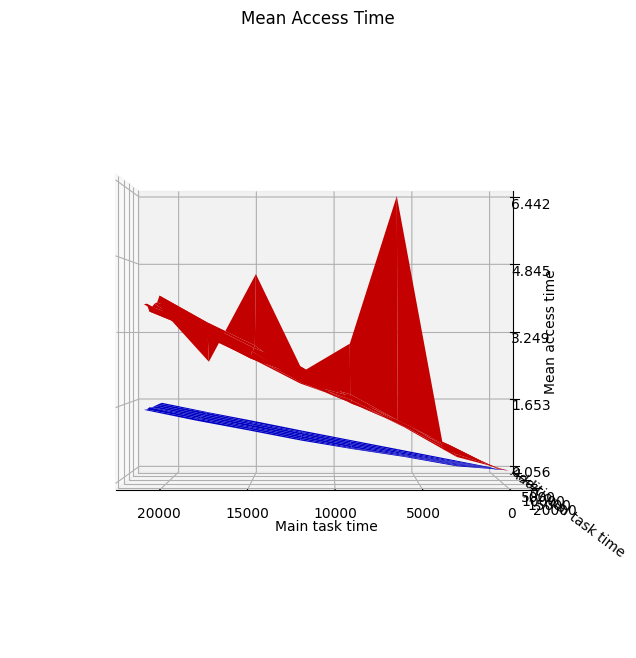

Locks: red, AO: blue, P/K amount: 5


In [6]:
draw_plot(df_lc, 
          df_ao,
          "Locks",
          "AO",
          5, 
          "Mean Access Time",
          "Main task time",
          "Additional task time",
          "Mean access time",
          "mean_access_time",
         0,90)
print(f"Locks: red, AO: blue, P/K amount: 5")

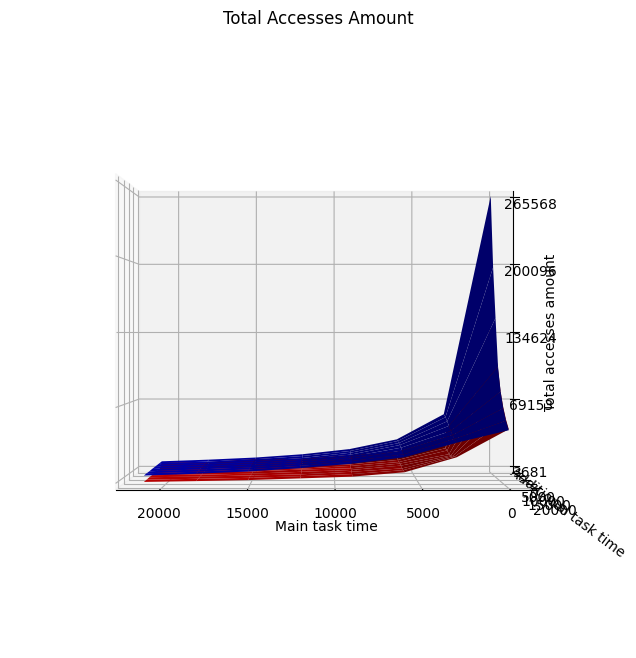

Locks: red, AO: blue, P/K amount: 5


In [7]:
draw_plot(df_lc, 
          df_ao,
          "Locks",
          "AO",
          5, 
          "Total Accesses Amount",
          "Main task time",
          "Additional task time",
          "Total accesses amount",
          "accesses_amount",
         0,90)
print(f"Locks: red, AO: blue, P/K amount: 5")